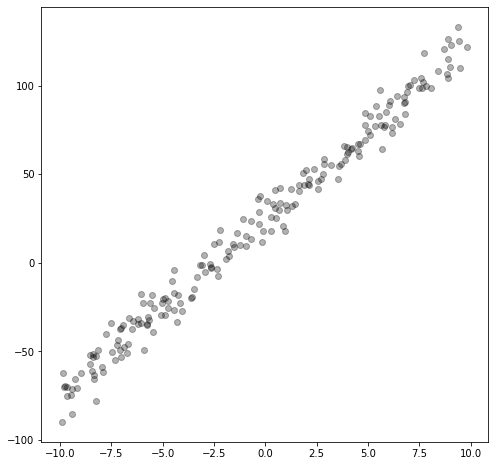

In [1]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"

data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c = 'k', alpha=0.3)
plt.show()
